<a href="https://colab.research.google.com/github/Samruddhi942/ProdigyInfoTech_ML_Task03/blob/main/Cat_and_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref=zipfile.ZipFile('C:\\archive.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [36]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

Categories = ['cat', 'dog']
flat_data_arr = []  # input array
target_arr = []  # output array

# Specify the path to your images directory
path = r'C:\Users\Vaibhav\OneDrive\文件\GitHub\Cats-and-Dogs-Classifier\PetImages'

# Iterate through each category (cat and dog)
for category in Categories:
    print(f'loading... category: {category}')

    # Form the complete path to the category directory
    category_path = os.path.join(path, category)

    # Iterate through each image file in the category directory
    for img in os.listdir(category_path):
        # Skip non-image files (like Thumbs.db)
        if not img.endswith('.jpg') and not img.endswith('.png'):
            continue

        img_array = imread(os.path.join(category_path, img))
        img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
        
        # Flatten and ensure consistent shape
        flattened_img = img_resized.flatten()
        
        # Check if flattened_img has consistent shape
        if flattened_img.shape[0] == 4800:  # Ensure the correct shape after flatten
            flat_data_arr.append(flattened_img)
            target_arr.append(Categories.index(category))
        else:
            print(f"Skipping image '{img}' due to inconsistent shape: {flattened_img.shape}")

    print(f'loaded category: {category} successfully')

# Convert lists to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)


loading... category: cat
Skipping image '10125.jpg' due to inconsistent shape: (14400,)
Skipping image '10501.jpg' due to inconsistent shape: (14400,)
Skipping image '10820.jpg' due to inconsistent shape: (14400,)
Skipping image '11210.jpg' due to inconsistent shape: (14400,)
Skipping image '11565.jpg' due to inconsistent shape: (14400,)
Skipping image '11874.jpg' due to inconsistent shape: (14400,)
Skipping image '11935.jpg' due to inconsistent shape: (14400,)
Skipping image '140.jpg' due to inconsistent shape: (14400,)
Skipping image '2663.jpg' due to inconsistent shape: (14400,)
Skipping image '3300.jpg' due to inconsistent shape: (14400,)
Skipping image '3491.jpg' due to inconsistent shape: (14400,)
Skipping image '4833.jpg' due to inconsistent shape: (14400,)
Skipping image '5553.jpg' due to inconsistent shape: (14400,)
Skipping image '660.jpg' due to inconsistent shape: (14400,)
Skipping image '7968.jpg' due to inconsistent shape: (14400,)
Skipping image '7978.jpg' due to inconsi

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(24913, 4801)

In [38]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [39]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)

In [40]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

# Example data (replace with your actual data preparation)
x_train = np.random.rand(100, 40, 40, 3)  # Example: 100 images of size 40x40 with 3 channels
y_train = np.random.randint(0, 2, size=(100,))  # Example: Binary labels (0 or 1)

# Define your model
model = Sequential([
    Flatten(input_shape=(40, 40, 3)),  # Example: Flattening images
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Example: Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for review
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


C:\Users\Vaibhav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       307,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,329 (1.17 MB)

 Trainable params: 307,329 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.3758 - loss: 2.3510 - val_accuracy: 0.5500 - val_loss: 0.9831
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4852 - loss: 1.2477 - val_accuracy: 0.5500 - val_loss: 1.1013
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4836 - loss: 1.0166 - val_accuracy: 0.4500 - val_loss: 0.7791
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5188 - loss: 0.7496 - val_accuracy: 0.4500 - val_loss: 1.1906
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5422 - loss: 0.9408 - val_accuracy: 0.4500 - val_loss: 0.8011


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming x_test and y_test are already prepared
# x_test should be your input features (e.g., flattened and resized images)
# y_test should be your target labels (e.g., 0 for 'cat' and 1 for 'dog')

# Define or load x_test (replace with your actual data preparation)
# Example: Loading or generating x_test (input features)
x_test = np.random.rand(100, 40, 40, 3)  # Example: 100 images of size 40x40 with 3 channels

# Define or load y_test (replace with your actual data preparation)
# Example: Generating synthetic y_test (true labels)
y_test = np.random.randint(2, size=100)  # Example: Random binary labels (0 or 1) for 100 samples

# Ensure x_test and y_test are properly defined with your actual data preparation code

# Testing the model
y_pred = model.predict(x_test)

# Round predictions if necessary
y_pred_rounded = np.round(y_pred).astype(int)  # Round to get binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
The model is 57.99999999999999% accurate


In [12]:
from sklearn.metrics import classification_report

# Example: Define or load y_test and y_pred
y_test = np.random.randint(2, size=100)  # Example: Random binary labels (0 or 1) for 100 samples
y_pred = model.predict(x_test)  # Example: Replace with actual predictions from your model

# If y_pred are probabilities, round them to get binary predictions (0 or 1)
y_pred_binary = np.round(y_pred).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_binary, target_names=['cat', 'dog']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

         cat       0.00      0.00      0.00        47
         dog       0.53      1.00      0.69        53

    accuracy                           0.53       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.28      0.53      0.37       100



C:\Users\Vaibhav\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaibhav\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaibhav\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [21]:
from skimage.io import imread
import os

# Example path with raw string literal
image_path = r'C:\Users\Vaibhav\OneDrive\文件\GitHub\Cats-and-Dogs-Classifier\PetImages\dog\2.jpg'

try:
    # Check if file exists
    if os.path.exists(image_path):
        # Read the image
        img = imread(image_path)
        print(f"Image loaded successfully from: {image_path}")
    else:
        print(f"File not found at: {image_path}")

except Exception as e:
    print(f"Error loading image: {str(e)}")



Image loaded successfully from: C:\Users\Vaibhav\OneDrive\文件\GitHub\Cats-and-Dogs-Classifier\PetImages\dog\2.jpg


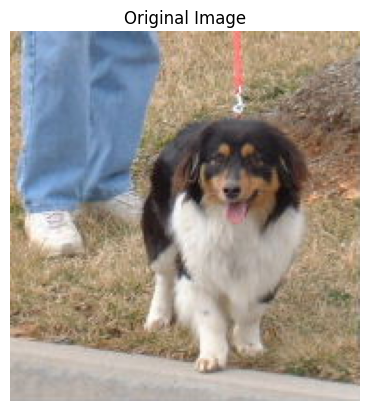

ValueError encountered: Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None


In [24]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# Example path (raw string literal)
path = r'C:\Users\Vaibhav\OneDrive\文件\GitHub\Cats-and-Dogs-Classifier\PetImages\dog\2.jpg'

# Load the image
img = imread(path)

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Resize the image
img_resized = resize(img, (40, 40, 3))  # Adjust size as needed

# Flatten and prepare for prediction
img_flat = img_resized.flatten()
img_for_prediction = np.array([img_flat])  # Convert to numpy array for prediction

# Example categories (adjust as per your model and dataset)
Categories = ['cat', 'dog']

try:
    # Assuming 'model' is your trained machine learning model for classification
    # Replace this with your actual model prediction code
    predicted_class = model.predict(img_for_prediction)[0]

    # Print the predicted category
    print(f"The predicted image is: {Categories[predicted_class]}")

except ValueError as ve:
    print(f"ValueError encountered: {ve}")

except Exception as e:
    print(f"Error encountered: {e}")
